# NumPy Basics: Arrays and Vectorized Computation

In [64]:

%matplotlib inline

ImportError: No module named kernelapp

In [3]:
from __future__ import division
from numpy.random import randn
import numpy as np
np.set_printoptions(precision=4, suppress=True)
%cd ../book_scripts

[Errno 2] No such file or directory: '../book_scripts'
/git/stat504-python


## The NumPy ndarray: a multidimensional array object

In [4]:
data = randn(2, 3)

In [5]:
data
data * 10
data + data

array([[-2.3682, -2.8679, -1.0521],
       [-0.9279, -2.1796,  0.3124]])

In [6]:
data.shape
data.dtype

dtype('float64')

### Creating ndarrays

In [7]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

In [8]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2
arr2.ndim
arr2.shape

(2, 4)

In [9]:
arr1.dtype
arr2.dtype

dtype('int64')

In [10]:
np.zeros(10)
np.zeros((3, 6))
np.empty((2, 3, 2))

array([[[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]]])

In [11]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Data Types for ndarrays

In [12]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype
arr2.dtype

dtype('int32')

In [13]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [14]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [15]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([  1.25,  -9.6 ,  42.  ])

In [16]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [17]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

### Operations between arrays and scalars

In [18]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr
arr * arr
arr - arr

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [19]:
1 / arr
arr ** 0.5

array([[ 1.    ,  1.4142,  1.7321],
       [ 2.    ,  2.2361,  2.4495]])

### Basic indexing and slicing

In [20]:
arr = np.arange(10)
arr
arr[5]
arr[5:8]
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [21]:
arr_slice = arr[5:8]
arr_slice[1] = 12345
arr
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [22]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [23]:
arr2d[0][2]
arr2d[0, 2]

3

In [24]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [25]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [26]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [27]:
arr3d[1, 0]

array([7, 8, 9])

#### Indexing with slices

In [28]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [29]:
arr2d
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [30]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [31]:
arr2d[1, :2]
arr2d[2, :1]

array([7])

In [32]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [33]:
arr2d[:2, 1:] = 0

### Boolean indexing

In [34]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = randn(7, 4)
names
data

array([[ 0.8575,  0.0152, -0.8941, -0.3253],
       [ 0.6662,  0.1215, -0.4062, -0.6962],
       [-0.3732,  1.4843,  0.0326, -0.2582],
       [-0.7262,  1.6847, -1.3308,  0.4704],
       [ 2.5007, -0.129 , -0.4304, -0.6453],
       [ 0.3299, -0.4121, -0.7067, -0.4162],
       [-0.6942,  0.0322, -0.0989, -0.2843]])

In [35]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [36]:
data[names == 'Bob']

array([[ 0.8575,  0.0152, -0.8941, -0.3253],
       [-0.7262,  1.6847, -1.3308,  0.4704]])

In [37]:
data[names == 'Bob', 2:]
data[names == 'Bob', 3]

array([-0.3253,  0.4704])

In [38]:
names != 'Bob'
data[-(names == 'Bob')]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: numpy boolean negative (the unary `-` operator) is deprecated, use the bitwise_xor (the `^` operator) or the logical_xor function instead.
  from ipykernel import kernelapp as app


array([[ 0.6662,  0.1215, -0.4062, -0.6962],
       [-0.3732,  1.4843,  0.0326, -0.2582],
       [ 2.5007, -0.129 , -0.4304, -0.6453],
       [ 0.3299, -0.4121, -0.7067, -0.4162],
       [-0.6942,  0.0322, -0.0989, -0.2843]])

In [39]:
mask = (names == 'Bob') | (names == 'Will')
mask
data[mask]

array([[ 0.8575,  0.0152, -0.8941, -0.3253],
       [-0.3732,  1.4843,  0.0326, -0.2582],
       [-0.7262,  1.6847, -1.3308,  0.4704],
       [ 2.5007, -0.129 , -0.4304, -0.6453]])

In [40]:
data[data < 0] = 0
data

array([[ 0.8575,  0.0152,  0.    ,  0.    ],
       [ 0.6662,  0.1215,  0.    ,  0.    ],
       [ 0.    ,  1.4843,  0.0326,  0.    ],
       [ 0.    ,  1.6847,  0.    ,  0.4704],
       [ 2.5007,  0.    ,  0.    ,  0.    ],
       [ 0.3299,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.0322,  0.    ,  0.    ]])

In [41]:
data[names != 'Joe'] = 7
data

array([[ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 0.6662,  0.1215,  0.    ,  0.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 0.3299,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.0322,  0.    ,  0.    ]])

### Fancy indexing

In [66]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [43]:
arr[[4, 3, 0, 6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [44]:
arr[[-3, -5, -7]]

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

In [67]:
# more on reshape in Chapter 12
arr = np.arange(32).reshape((8, 4))
print arr
print arr[[1, 5, 7, 2], [0, 3, 1, 2]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
[ 4 23 29 10]


In [46]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [68]:
np.ix_([1, 5, 7, 2], [0, 3, 1, 2])

(array([[1],
        [5],
        [7],
        [2]]), array([[0, 3, 1, 2]]))

### Transposing arrays and swapping axes

In [72]:
arr = np.arange(15).reshape((3, 5))
arr
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [76]:
arr = np.random.randn(6, 3)
np.dot(arr.T, arr)

array([[  3.1814,  -2.3198,  -0.0206],
       [ -2.3198,  16.9179,  -5.7432],
       [ -0.0206,  -5.7432,   3.5111]])

In [78]:
arr = np.arange(16).reshape((2, 2, 4))
print arr
print arr.transpose((2, 0, 1))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
[[[ 0  4]
  [ 8 12]]

 [[ 1  5]
  [ 9 13]]

 [[ 2  6]
  [10 14]]

 [[ 3  7]
  [11 15]]]


In [75]:
arr
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal Functions: Fast element-wise array functions

In [52]:
arr = np.arange(10)
np.sqrt(arr)
np.exp(arr)

array([    1.    ,     2.7183,     7.3891,    20.0855,    54.5982,
         148.4132,   403.4288,  1096.6332,  2980.958 ,  8103.0839])

In [53]:
x = randn(8)
y = randn(8)
x
y
np.maximum(x, y) # element-wise maximum

array([ 0.7953,  0.6228,  0.3216,  0.2067, -0.0366, -0.6923,  2.4712,
        0.3055])

In [54]:
arr = randn(7) * 5
np.modf(arr)

(array([-0.5081, -0.4993, -0.2187, -0.6292,  0.7308,  0.6428,  0.2176]),
 array([-9., -2., -1., -4.,  1.,  5.,  3.]))

## Data processing using arrays

In [55]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [56]:
from matplotlib.pyplot import imshow, title

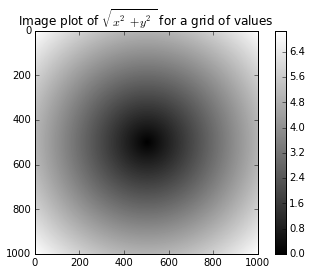

In [57]:
import matplotlib.pyplot as plt
z = np.sqrt(xs ** 2 + ys ** 2)
z
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [58]:
plt.draw()

### Expressing conditional logic as array operations

In [59]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [60]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

In [61]:
result = np.where(cond, xarr, yarr)
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [62]:
arr = randn(4, 4)
arr
np.where(arr > 0, 2, -2)
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[ 2.    ,  2.    ,  2.    ,  2.    ],
       [-0.2955,  2.    ,  2.    , -0.7019],
       [ 2.    , -2.1997, -1.5742,  2.    ],
       [ 2.    ,  2.    ,  2.    ,  2.    ]])

In [63]:
# Not to be executed

result = []
for i in range(n):
    if cond1[i] and cond2[i]:
        result.append(0)
    elif cond1[i]:
        result.append(1)
    elif cond2[i]:
        result.append(2)
    else:
        result.append(3)

NameError: name 'n' is not defined

In [ ]:
# Not to be executed

np.where(cond1 & cond2, 0,
         np.where(cond1, 1,
                  np.where(cond2, 2, 3)))

In [ ]:
# Not to be executed

result = 1 * cond1 + 2 * cond2 + 3 * -(cond1 | cond2)

### Mathematical and statistical methods

In [ ]:
arr = np.random.randn(5, 4) # normally-distributed data
arr.mean()
np.mean(arr)
arr.sum()

In [ ]:
arr.mean(axis=1)
arr.sum(0)

In [ ]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr.cumsum(0)
arr.cumprod(1)

### Methods for boolean arrays

In [ ]:
arr = randn(100)
(arr > 0).sum() # Number of positive values

In [ ]:
bools = np.array([False, False, True, False])
bools.any()
bools.all()

### Sorting

In [ ]:
arr = randn(8)
arr
arr.sort()
arr

In [ ]:
arr = randn(5, 3)
arr
arr.sort(1)
arr

In [ ]:
large_arr = randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

### Unique and other set logic

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
    np.unique(names)
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

In [ ]:
sorted(set(names))

In [ ]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

## File input and output with arrays

### Storing arrays on disk in binary format

In [ ]:
arr = np.arange(10)
np.save('some_array', arr)

In [ ]:
np.load('some_array.npy')

In [ ]:
np.savez('array_archive.npz', a=arr, b=arr)

In [ ]:
arch = np.load('array_archive.npz')
arch['b']

In [ ]:
!rm some_array.npy
!rm array_archive.npz

### Saving and loading text files

In [ ]:
!cat array_ex.txt

In [ ]:
arr = np.loadtxt('array_ex.txt', delimiter=',')
arr

## Linear algebra

In [ ]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)  # equivalently np.dot(x, y)

In [ ]:
np.dot(x, np.ones(3))

In [ ]:
np.random.seed(12345)

In [ ]:
from numpy.linalg import inv, qr
X = randn(5, 5)
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
r

## Random number generation

In [ ]:
samples = np.random.normal(size=(4, 4))
samples

In [ ]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in xrange(N)]
%timeit np.random.normal(size=N)

## Example: Random Walks

In [ ]:
np.random.seed(12345)

In [ ]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [ ]:
walk.min()
walk.max()

In [ ]:
(np.abs(walk) >= 10).argmax()

### Simulating many random walks at once

In [ ]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

In [ ]:
walks.max()
walks.min()

In [ ]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

In [ ]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

In [ ]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))